In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('Distributor Outlet Mapping.csv')
df2 = pd.read_csv('Outlet Info.csv')
df3 = pd.read_csv('Sales.csv')

In [4]:
df1.head()

,distributor_id,outlet_id
0,distributor_24,outlet_code_1
1,distributor_24,outlet_code_2
2,distributor_24,outlet_code_3
3,distributor_3,outlet_code_4
4,distributor_21,outlet_code_5


In [5]:
df2.head()

,outlet_id,region,outlet_size,population_density,number_of_skus_sold,average_household_income
0,outlet_code_1,outstation,1334,276,16,81704
1,outlet_code_2,outstation,1336,276,16,81789
2,outlet_code_3,outstation,1341,277,16,82046
3,outlet_code_4,outstation,1025,239,13,66259
4,outlet_code_5,upcountry,3965,646,35,59469


In [6]:
df3.head()

,outlet_id,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity
0,outlet_code_78,2023-01-05 12:41,25mm,freezers available,Sweet Delights Mix,3
1,outlet_code_78,2023-01-12 13:05,0mm,freezers available,Sweet Delights Mix,3
2,outlet_code_78,2023-01-17 9:32,79mm,freezers available,Sweet Delights Mix,3
3,outlet_code_78,2023-01-27 14:21,194.51mm,freezers available,Sweet Delights Mix,2
4,outlet_code_78,2023-01-31 16:24,15mm,freezers available,Sweet Delights Mix,3


In [7]:
merged_table = pd.merge(df1, df2, on='outlet_id', how='inner')
merged_table = pd.merge(merged_table, df3, on='outlet_id', how='inner')
merged_table.head()

,distributor_id,outlet_id,region,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity
0,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-06 10:51,60mm,freezers available,Fruit Chewy Bites,4
1,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-12 15:14,6mm,freezers available,Fruit Chewy Bites,5
2,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-16 16:25,82mm,freezers available,Fruit Chewy Bites,5
3,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-01-24 8:55,172.53mm,freezers available,Fruit Chewy Bites,7
4,distributor_24,outlet_code_1,outstation,1334,276,16,81704,2023-02-04 9:53,59mm,freezers available,Fruit Chewy Bites,5


In [8]:
# Assuming you have already created the merged_table DataFrame

for column in merged_table.columns:
    unique_values = merged_table[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for distributor_id:
['distributor_24' 'distributor_3' 'distributor_21' 'distributor_2'
 'distributor_1' 'distributor_7' 'distributor_4' 'distributor_25'
 'distributor_14' 'distributor_11' 'distributor_16' 'distributor_10'
 'distributor_19' 'distributor_9' 'distributor_20' 'distributor_8'
 'distributor_22' 'distributor_12' 'distributor_5' 'distributor_13'
 'distributor_18' 'distributor_23' 'distributor_17' 'distributor_15'
 'distributor_6']

Unique values for outlet_id:
['outlet_code_1' 'outlet_code_2' 'outlet_code_3' ... 'outlet_code_4198'
 'outlet_code_4199' 'outlet_code_4200']

Unique values for region:
['outstation' 'upcountry' 'western']

Unique values for outlet_size:
[1334 1336 1341 ... 3070 3619 2644]

Unique values for population_density:
[ 276  277  239 ... 2106 2378 1390]

Unique values for number_of_skus_sold:
[16 13 35 21 25 18 22 41 31 28 32 29 46 54 19 14 12 15 17 20 56 26 49 47
 24 45 53 38 10 23 37 44 27 11 52 42 50 51 34 33 39 43 40 30 36 55 48 58
 59 60 

In [9]:
# Assuming you have already created the merged_table DataFrame

# Remove "distributor_" part and convert to int
merged_table['distributor_id'] = merged_table['distributor_id'].str.replace('distributor_', '').astype(int)

# Display unique values for the modified distributor_id column
unique_values = merged_table['distributor_id'].unique()
print(f"Unique values for distributor_id:\n{unique_values}\n")


Unique values for distributor_id:
[24  3 21  2  1  7  4 25 14 11 16 10 19  9 20  8 22 12  5 13 18 23 17 15
  6]



In [10]:
# Assuming you have already created the merged_table DataFrame

# Remove "outlet_code_" part and convert to int
merged_table['outlet_id'] = merged_table['outlet_id'].str.replace('outlet_code_', '').astype(int)

# Display unique values for the modified outlet_id column
unique_values = merged_table['outlet_id'].unique()
print(f"Unique values for outlet_id:\n{unique_values}\n")


Unique values for outlet_id:
[   1    2    3 ... 4198 4199 4200]



In [11]:
# Assuming you have already created the merged_table DataFrame
from sklearn.preprocessing import LabelEncoder
# One-hot encode the 'region' column
label_encoder = LabelEncoder()

# Apply label encoding to 'region' column
merged_table['region_label_encoded'] = label_encoder.fit_transform(merged_table['region'])

# Display the updated DataFrame
merged_table.drop('region', axis=1, inplace=True)
merged_table.head()


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,region_label_encoded
0,24,1,1334,276,16,81704,2023-01-06 10:51,60mm,freezers available,Fruit Chewy Bites,4,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,6mm,freezers available,Fruit Chewy Bites,5,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,82mm,freezers available,Fruit Chewy Bites,5,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53mm,freezers available,Fruit Chewy Bites,7,0
4,24,1,1334,276,16,81704,2023-02-04 9:53,59mm,freezers available,Fruit Chewy Bites,5,0


In [12]:
# Assuming you have already created the merged_table DataFrame

# Clean 'expected_rainfall' column and convert to numeric
merged_table['expected_rainfall'] = pd.to_numeric(merged_table['expected_rainfall'].str.replace('mm', '')).astype(float)

# Display the updated DataFrame
merged_table.head()


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,region_label_encoded
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,freezers available,Fruit Chewy Bites,4,0
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,freezers available,Fruit Chewy Bites,5,0
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,freezers available,Fruit Chewy Bites,5,0
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,freezers available,Fruit Chewy Bites,7,0
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,freezers available,Fruit Chewy Bites,5,0


In [13]:
# [' freezers available ' '   freezers available ' ' no freezers available '
#  '  freezers available ']

def binary_encode_freezer_status(status):
    if '  freezers available ' or ' freezers available ' or '   freezers available ' in status.lower():
        return 1 
    else:
        return 0
    
merged_table['freezer_status_binary'] = merged_table['freezer_status'].apply(binary_encode_freezer_status)

merged_table.head(20)

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,region_label_encoded,freezer_status_binary
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,freezers available,Fruit Chewy Bites,4,0,1
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,freezers available,Fruit Chewy Bites,5,0,1
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,freezers available,Fruit Chewy Bites,5,0,1
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,freezers available,Fruit Chewy Bites,7,0,1
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,freezers available,Fruit Chewy Bites,5,0,1
5,24,1,1334,276,16,81704,2023-02-10 10:01,15.00,freezers available,Fruit Chewy Bites,10,0,1
6,24,1,1334,276,16,81704,2023-02-18 12:09,33.00,freezers available,Fruit Chewy Bites,7,0,1
7,24,1,1334,276,16,81704,2023-02-23 16:16,4.00,freezers available,Fruit Chewy Bites,7,0,1
8,24,1,1334,276,16,81704,2023-03-02 9:50,178.29,freezers available,Fruit Chewy Bites,7,0,1
9,24,1,1334,276,16,81704,2023-03-08 12:49,3.00,freezers available,Fruit Chewy Bites,10,0,1


In [14]:
merged_table.drop(columns=['freezer_status'], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have already created the merged_table DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'sku_name'
merged_table['sku_name_label_encoded'] = label_encoder.fit_transform(merged_table['sku_name'])

# Display the mapping of original values to encoded values
print("Mapping of original values to encoded values:")
for original, encoded in zip(merged_table['sku_name'].unique(), merged_table['sku_name_label_encoded'].unique()):
    print(f"{original} -> {encoded}")

merged_table.head()

Mapping of original values to encoded values:
Fruit Chewy Bites -> 2
Gummy Carnival Assortment -> 3
Caramel Bliss Bonbons -> 0
Choco Heaven Bars -> 1
Sweet Delights Mix -> 5
Minty Fresh Treats -> 4


,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sku_name,sales_quantity,region_label_encoded,freezer_status_binary,sku_name_label_encoded
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,Fruit Chewy Bites,4,0,1,2
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,Fruit Chewy Bites,5,0,1,2
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,Fruit Chewy Bites,5,0,1,2
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,Fruit Chewy Bites,7,0,1,2
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,Fruit Chewy Bites,5,0,1,2


In [16]:
merged_table.drop(columns=['sku_name'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sales_quantity,region_label_encoded,freezer_status_binary,sku_name_label_encoded
0,24,1,1334,276,16,81704,2023-01-06 10:51,60.00,4,0,1,2
1,24,1,1334,276,16,81704,2023-01-12 15:14,6.00,5,0,1,2
2,24,1,1334,276,16,81704,2023-01-16 16:25,82.00,5,0,1,2
3,24,1,1334,276,16,81704,2023-01-24 8:55,172.53,7,0,1,2
4,24,1,1334,276,16,81704,2023-02-04 9:53,59.00,5,0,1,2


In [17]:
merged_table.dtypes

distributor_id                int32
outlet_id                     int32
outlet_size                   int64
population_density            int64
number_of_skus_sold           int64
average_household_income      int64
transaction_time             object
expected_rainfall           float64
sales_quantity                int64
region_label_encoded          int32
freezer_status_binary         int64
sku_name_label_encoded        int32
dtype: object

In [18]:
# Assuming 'transaction_time' is a column in the merged_table dataframe
merged_table['transaction_time'] = pd.to_datetime(merged_table['transaction_time'])

# Extracting features
merged_table['dayofweek'] = merged_table['transaction_time'].dt.dayofweek
merged_table['day'] = merged_table['transaction_time'].dt.day  # Added line for day
merged_table['month'] = merged_table['transaction_time'].dt.month
merged_table['quarter'] = merged_table['transaction_time'].dt.quarter
merged_table['year'] = merged_table['transaction_time'].dt.year
merged_table['time'] = merged_table['transaction_time'].dt.time

merged_table.drop(columns=['transaction_time'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,expected_rainfall,sales_quantity,region_label_encoded,freezer_status_binary,sku_name_label_encoded,dayofweek,day,month,quarter,year,time
0,24,1,1334,276,16,81704,60.00,4,0,1,2,4,6,1,1,2023,10:51:00
1,24,1,1334,276,16,81704,6.00,5,0,1,2,3,12,1,1,2023,15:14:00
2,24,1,1334,276,16,81704,82.00,5,0,1,2,0,16,1,1,2023,16:25:00
3,24,1,1334,276,16,81704,172.53,7,0,1,2,1,24,1,1,2023,08:55:00
4,24,1,1334,276,16,81704,59.00,5,0,1,2,5,4,2,1,2023,09:53:00


In [19]:
# Assuming 'time' is a column in the merged_table dataframe
merged_table['time'] = pd.to_datetime(merged_table['time'], format='%H:%M:%S')

# Creating synthetic features for morning, evening, and nighttime
merged_table['morning'] = ((merged_table['time'].dt.hour >= 6) & (merged_table['time'].dt.hour < 12)).astype(int)
merged_table['evening'] = ((merged_table['time'].dt.hour >= 12) & (merged_table['time'].dt.hour < 18)).astype(int)
merged_table['night'] = ((merged_table['time'].dt.hour >= 18) | (merged_table['time'].dt.hour < 6)).astype(int)

merged_table.drop(columns=['time'], inplace=True)
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,expected_rainfall,sales_quantity,region_label_encoded,freezer_status_binary,sku_name_label_encoded,dayofweek,day,month,quarter,year,morning,evening,night
0,24,1,1334,276,16,81704,60.00,4,0,1,2,4,6,1,1,2023,1,0,0
1,24,1,1334,276,16,81704,6.00,5,0,1,2,3,12,1,1,2023,0,1,0
2,24,1,1334,276,16,81704,82.00,5,0,1,2,0,16,1,1,2023,0,1,0
3,24,1,1334,276,16,81704,172.53,7,0,1,2,1,24,1,1,2023,1,0,0
4,24,1,1334,276,16,81704,59.00,5,0,1,2,5,4,2,1,2023,1,0,0


In [20]:
merged_table.drop(columns=['year'], inplace=True)

In [21]:
print(merged_table)

        distributor_id  outlet_id  outlet_size  population_density  \
0                   24          1         1334                 276   
1                   24          1         1334                 276   
2                   24          1         1334                 276   
3                   24          1         1334                 276   
4                   24          1         1334                 276   
...                ...        ...          ...                 ...   
371031              14       4200          795                1390   
371032              14       4200          795                1390   
371033              14       4200          795                1390   
371034              14       4200          795                1390   
371035              14       4200          795                1390   

        number_of_skus_sold  average_household_income  expected_rainfall  \
0                        16                     81704              60.00   
1      

In [22]:
feature_names = merged_table.columns.tolist()
print(feature_names)

['distributor_id', 'outlet_id', 'outlet_size', 'population_density', 'number_of_skus_sold', 'average_household_income', 'expected_rainfall', 'sales_quantity', 'region_label_encoded', 'freezer_status_binary', 'sku_name_label_encoded', 'dayofweek', 'day', 'month', 'quarter', 'morning', 'evening', 'night']


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_k

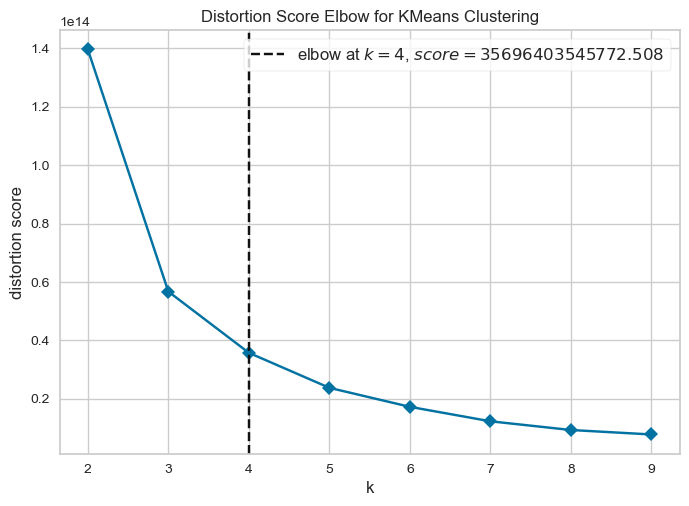

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have already created the merged_table DataFrame

# Select features for clustering (adjust as needed)
features_for_clustering = feature_names
# # Select the number of clusters (adjust as needed)
n_clusters = 4

# # Create a subset of the DataFrame with selected features
X = merged_table[features_for_clustering]

# # Fit KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# merged_table['cluster'] = kmeans.fit_predict(X)

# Plot the elbow method
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

# Display the updated DataFrame with cluster assignments
# print(merged_table[['outlet_id', 'cluster']])


In [24]:
merged_table.head()

,distributor_id,outlet_id,outlet_size,population_density,number_of_skus_sold,average_household_income,expected_rainfall,sales_quantity,region_label_encoded,freezer_status_binary,sku_name_label_encoded,dayofweek,day,month,quarter,morning,evening,night
0,24,1,1334,276,16,81704,60.00,4,0,1,2,4,6,1,1,1,0,0
1,24,1,1334,276,16,81704,6.00,5,0,1,2,3,12,1,1,0,1,0
2,24,1,1334,276,16,81704,82.00,5,0,1,2,0,16,1,1,0,1,0
3,24,1,1334,276,16,81704,172.53,7,0,1,2,1,24,1,1,1,0,0
4,24,1,1334,276,16,81704,59.00,5,0,1,2,5,4,2,1,1,0,0


In [25]:
#drop outlet_size	population_density	number_of_skus_sold	average_household_income region_label_encoded	sku_name_label_encoded	
merged_table.drop(columns=['outlet_size', 'population_density', 'number_of_skus_sold', 'average_household_income', 'region_label_encoded', 'sku_name_label_encoded'], inplace=True)

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_k

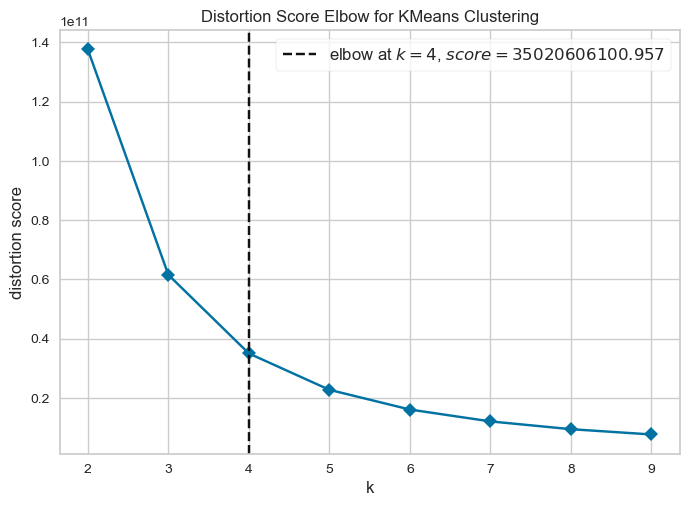

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have already created the merged_table DataFrame
feature_names = merged_table.columns.tolist()
# Select features for clustering (adjust as needed)
features_for_clustering = feature_names
# # Select the number of clusters (adjust as needed)
n_clusters = 4

# # Create a subset of the DataFrame with selected features
X = merged_table[features_for_clustering]

# # Fit KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
merged_table['cluster'] = kmeans.fit_predict(X)

# Plot the elbow method
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

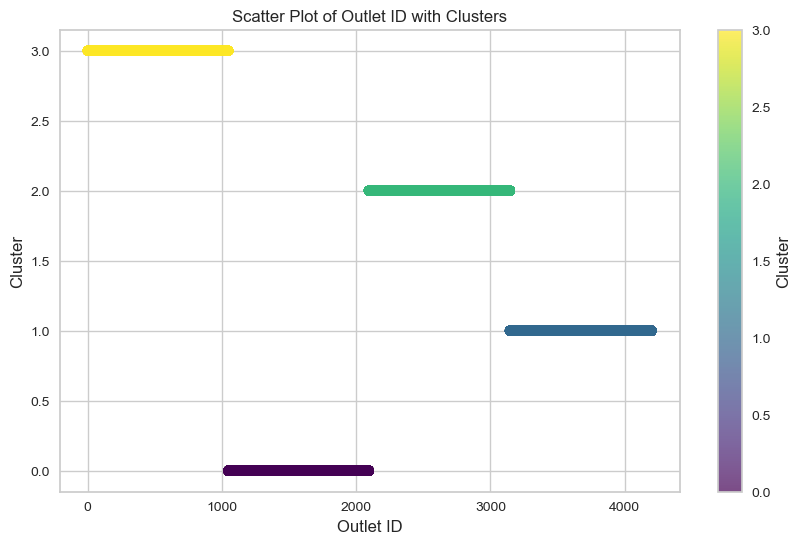

In [30]:
import matplotlib.pyplot as plt

# Assuming you have already created the merged_table DataFrame and assigned clusters
# Uncomment the following line if not already assigned
# merged_table['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_table['outlet_id'], merged_table['cluster'], c=merged_table['cluster'], cmap='viridis', marker='o', alpha=0.7)

# Set plot labels and title
plt.xlabel('Outlet ID')
plt.ylabel('Cluster')
plt.title('Scatter Plot of Outlet ID with Clusters')

# Show the colorbar
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()
